# Decision Trees and Random Forests in Python

This is the code for the tree methods in Python. We use the same dataset, 'titanic_cleaned'.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv("titanic_cleaned (1).csv")

In [3]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [4]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree=dtree.fit(X_train,y_train)

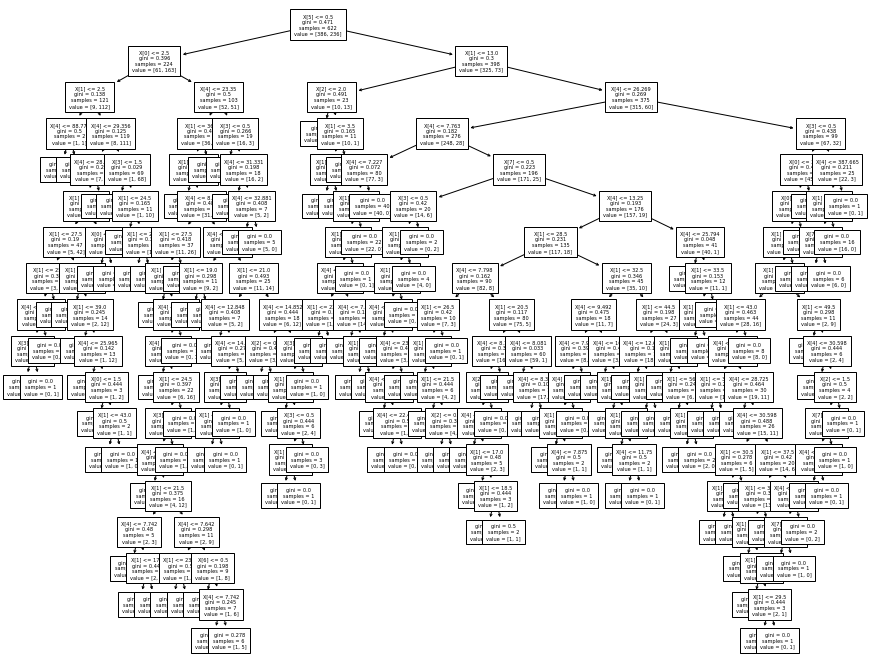

In [11]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 12))
tree.plot_tree(dtree, fontsize=5)
plt.show()

**Question: Which feature is most important? (Poll)**

In [12]:
dtree.feature_importances_

array([9.60059997e-02, 2.84070903e-01, 4.81136857e-02, 3.88844237e-02,
       2.15175835e-01, 2.97690899e-01, 2.22586639e-04, 1.98356674e-02])

In [13]:
pd.DataFrame(dtree.feature_importances_, X_train.columns, columns=['Feature Importance'])

,Feature Importance
Pclass,0.096006
Age,0.284071
SibSp,0.048114
Parch,0.038884
Fare,0.215176
Sex_male,0.297691
Embarked_Q,0.000223
Embarked_S,0.019836


Thus, the most important feature is Sex_male, followed by Age and Fare. 

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       163
           1       0.73      0.68      0.71       104

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



In [17]:
print(confusion_matrix(y_test,predictions))

[[137  26]
 [ 33  71]]


**Question: Which model is better, logistic regression or decision tree?**

It seems like that the default decision tree is very complex. So it may face the overfitting problem. Now, let's apply some stopping rules. 

In [18]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree=dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       163
           1       0.86      0.72      0.79       104

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267



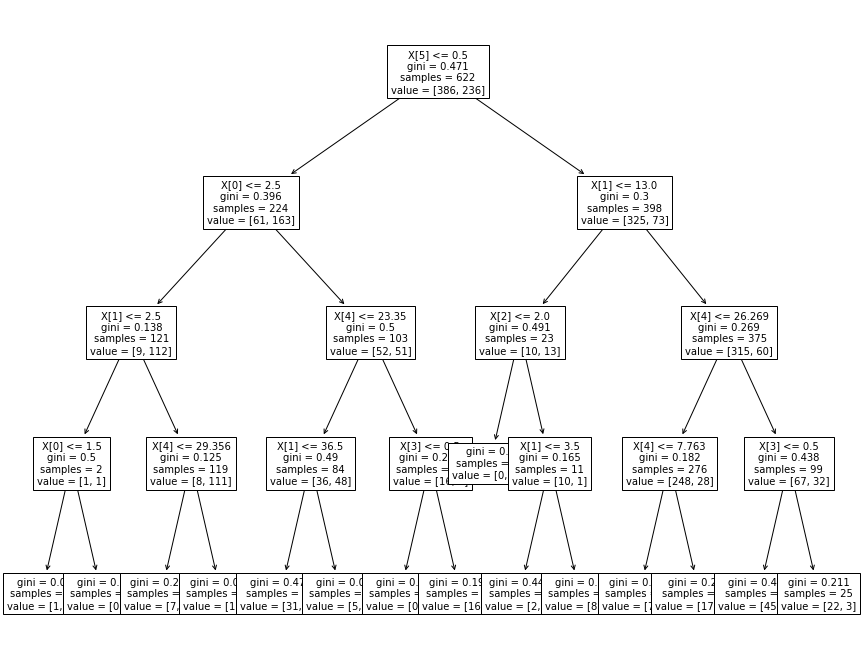

In [19]:
fig, ax = plt.subplots(figsize=(15, 12))
tree.plot_tree(dtree, fontsize=10)
plt.show()

We saw that by having a smaller decision tree, we could actually have a better tree. It indicates that our original model faced the overfitting problem. One question is then how we can find the best set of hyperparameters. This task is called a hyperparameter tuning. We will learn it later. 

# Random Forests

Now let's compare the decision tree model to a random forest.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[145  18]
 [ 28  76]]


In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       163
           1       0.81      0.73      0.77       104

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



**Question: Which model is better, logistic regression or random forest?**

## Comparing Machine Learning Algorithms consistently

Now let's compare multiple machine learning algorithms. We will compare 4 algorithms - Logistic Regression, Random Forest, KNN (K-nearest neighbor), and Naive Bayes.

In [24]:
# import different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# get accuracy score
from sklearn.metrics import accuracy_score

In [25]:
# prepare models
models=[]
models.append(('LR',LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))

In [26]:
# evaluate each model in turn
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    ac_score=accuracy_score(y_test,predictions)
    msg="%s: %f" % (name, ac_score)
    print(msg)  

LR: 0.827715
RFC: 0.820225
KNN: 0.692884
NB: 0.805243


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
from sklearn.metrics import roc_curve, auc

In [28]:
# Logistic Regression 
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr_predict_probs=lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, lr_thr=roc_curve(y_test,lr_predict_probs)
lr_roc_auc=auc(lr_fpr,lr_tpr)

# Random Forest
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict_probs=rfc.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, rfc_thr=roc_curve(y_test,rfc_predict_probs)
rfc_roc_auc=auc(rfc_fpr,rfc_tpr)

# K nearst neighbors
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict_probs=knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, knn_thr=roc_curve(y_test,knn_predict_probs)
knn_roc_auc=auc(knn_fpr,knn_tpr)

# Naive Bayes
nb=GaussianNB()
nb.fit(X_train, y_train)
nb_predict_probs=nb.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, nb_thr=roc_curve(y_test,nb_predict_probs)
nb_roc_auc=auc(nb_fpr,nb_tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


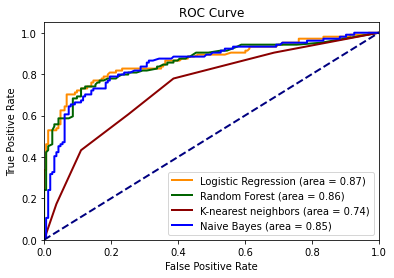

In [ ]:
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, color='darkgreen', lw=2, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='darkred', lw=2, label='K-nearest neighbors (area = %0.2f)' % knn_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### Use cross validation

We talked about the cross validation approach. Let's use it to compare different machine learning models. 

In [ ]:
from sklearn.model_selection import cross_val_score
import time

# evaluate each model in turn
results = []
names = []

models = []
models.append(('LR',LogisticRegression(solver='liblinear', random_state=101)))
models.append(('RFC',RandomForestClassifier(n_estimators=100, random_state=101)))
models.append(('KNC',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))


for name, model in models :
    start = time.time()
    cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    end = time.time()
    print(end-start)

LR: 0.797536 (0.027898)
0.0805974006652832
RFC: 0.812194 (0.041895)
1.983665943145752
KNC: 0.690769 (0.043353)
0.11192846298217773
NB: 0.781793 (0.017358)
0.05945229530334473


[Text(0, 0, 'LR'), Text(0, 0, 'RFC'), Text(0, 0, 'KNC'), Text(0, 0, 'NB')]

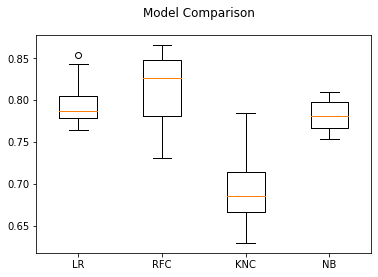

In [ ]:
# Select best model

fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Great Job!